In [2]:
DATA_PATH = "data/"
SEED=42

import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}store_train_transactions.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}store_test_transactions.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_ft = pd.read_csv(f"{DATA_PATH}train_scaling_1113.csv")
test_ft = pd.read_csv(f"{DATA_PATH}test_scaling_1113.csv")

cols = ["Unnamed: 0"]

train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)

target = train_target["target"]


In [3]:
train_ft = pd.read_csv(f"{DATA_PATH}train_encoding_1113.csv")
test_ft = pd.read_csv(f"{DATA_PATH}test_encoding_1113.csv")

In [4]:
train_ft.head()

,총방문일수,백화점이용기간,구매주기,주말방문일수,일별평균구매건수,구매간격_표준편차,마지막구매후_경과일,월요일_구매비율,화요일_구매비율,수요일_구매비율,...,주구매요일_4,주구매요일_5,주구매요일_6,평균구매요일_0,평균구매요일_1,평균구매요일_2,평균구매요일_3,평균구매요일_4,평균구매요일_5,평균구매요일_6
0,9,255,28,2,1.555556,22.744789,104,0.071429,0.000000,0.357143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,352,16,1,2.000000,11.739134,3,0.047619,0.261905,0.214286,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,55,356,6,11,1.854545,5.019987,4,0.254902,0.186275,0.127451,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,90,345,3,19,2.055556,3.137146,10,0.075676,0.113514,0.172973,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24,313,13,6,1.500000,11.962731,44,0.083333,0.055556,0.083333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
test_ft

,총방문일수,백화점이용기간,구매주기,주말방문일수,일별평균구매건수,구매간격_표준편차,마지막구매후_경과일,월요일_구매비율,화요일_구매비율,수요일_구매비율,...,주구매요일_4,주구매요일_5,주구매요일_6,평균구매요일_0,평균구매요일_1,평균구매요일_2,평균구매요일_3,평균구매요일_4,평균구매요일_5,평균구매요일_6
0,5,164,32,3,1.400000,30.416096,186,0.142857,0.285714,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,166,55,1,1.333333,57.879185,66,0.500000,0.000000,0.250000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,18,9,0,2.500000,7.361216,240,0.600000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,14,272,19,1,1.714286,17.715031,11,0.083333,0.083333,0.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7,265,37,3,2.142857,36.517818,76,0.066667,0.200000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12220,6,288,48,0,2.000000,41.249693,44,0.000000,0.000000,0.416667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12221,13,349,26,3,1.153846,39.135036,15,0.200000,0.266667,0.200000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12222,28,350,12,10,1.357143,10.733984,12,0.131579,0.078947,0.342105,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12223,106,347,3,25,1.924528,2.491627,17,0.127451,0.225490,0.235294,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### xgb best params

In [ ]:
# 최적
{'n_estimators': 1000,
 'learning_rate': 0.05586429569143906,
 'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 0.7802866974528223,
 'colsample_bytree': 0.7195355452001226,
 'gamma': 0.5614731761558893}

{'n_estimators': 1000,
 'learning_rate': 0.05586429569143906,
 'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 0.7802866974528223,
 'colsample_bytree': 0.7195355452001226,
 'gamma': 0.5614731761558893}

In [137]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 1000,
 'learning_rate': 0.05586429569143906,
 'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 0.7802866974528223,
 'colsample_bytree': 0.7195355452001226,
 'gamma': 0.5614731761558893}



In [ ]:
scores = []
models = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for tri, vai in cv.split(train_ft, target):
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)   
    
    models.append(model)

    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred, average='macro')
    scores.append(score)

print("Mean F1 Macro Score:", np.mean(scores))

In [4]:
scores

[0.7303364517468516,
 0.7163811478265885,
 0.7186401391181807,
 0.7286890588193444,
 0.7229813339840006]

In [5]:
models[0]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6290102054237857, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.648553153047272,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04036413044768581,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## 군집분석 ( kmeans가 가장 좋은 점수를 보임 )

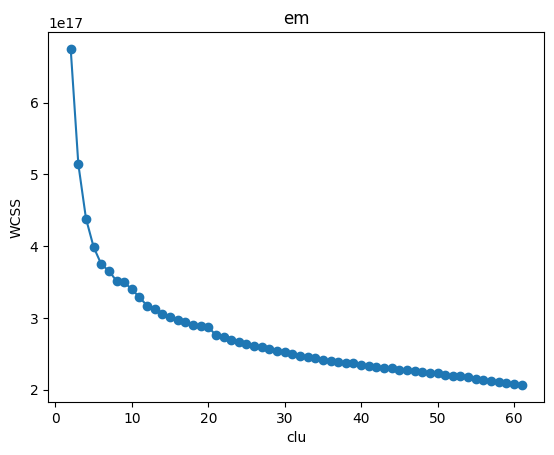

In [136]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

max_clusters = int(np.sqrt(len(train_ft)) // 2)
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_ft)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.title('em')
plt.xlabel('clu')
plt.ylabel('WCSS')
plt.show()

- 최적 클러스터 구하는건데 20일때 기울기가 가장크긴 한데 차이가 너무 적어서 2를 이용

최적의 클러스터 수: 20


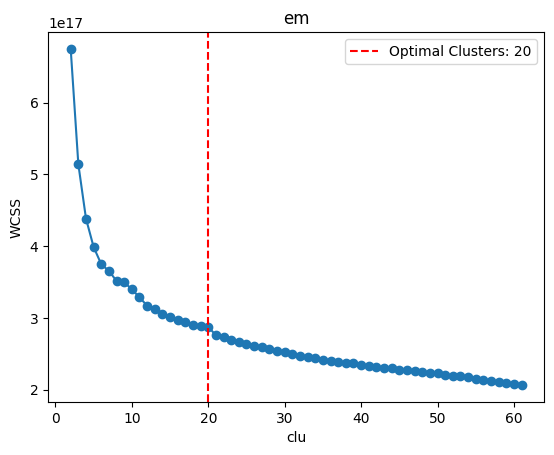

In [135]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

wcss = []
max_clusters = int(np.sqrt(len(train_ft)) // 2)  # 데이터 개수의 제곱근을 사용하여 최대 클러스터 수 설정
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_ft)
    wcss.append(kmeans.inertia_)

# WCSS 기울기 변화 계산 (2차 도함수 이용)
wcss_diff = np.diff(wcss)  # 1차 차분
wcss_diff2 = np.diff(wcss_diff)  # 2차 차분

# 기울기 변화가 가장 큰 위치의 클러스터 수
optimal_clusters = np.argmin(wcss_diff2) + 3  # 클러스터 수 2부터 시작하므로 보정

print("최적의 클러스터 수:", optimal_clusters)

plt.plot(range(2, max_clusters + 1), wcss, marker='o')
plt.axvline(optimal_clusters, color='r', linestyle='--', label=f'Optimal Clusters: {optimal_clusters}')
plt.title('em')
plt.xlabel('clu')
plt.ylabel('WCSS')
plt.legend()
plt.show()

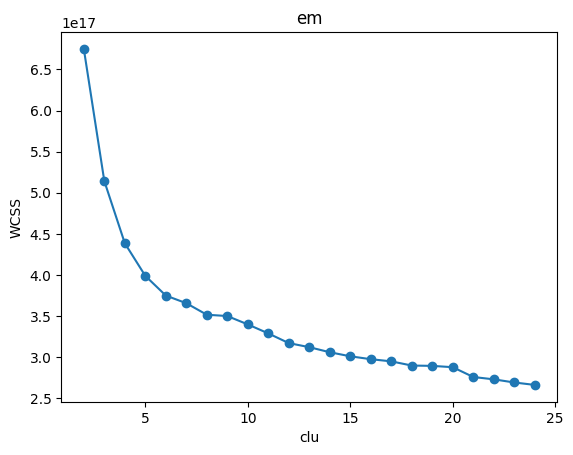

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(2,25):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train_ft)
    wcss.append(kmeans.inertia_)

# WCSS 시각화
plt.plot(range(2,25), wcss, marker='o')
plt.title('em')
plt.xlabel('clu')
plt.ylabel('WCSS')
plt.show()

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# KMeans 군집 분석
for i in range(2,8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    # train_ft['cluster_label'] = kmeans.fit_predict(train_ft)
    tmp = kmeans.fit_predict(train_ft)

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(train_ft, tmp)
    print(f"{i}, {silhouette_avg}")

2, 0.7499905421367516
3, 0.6418062825150469
4, 0.5496780902871773
5, 0.4792484597951247
6, 0.41945078816970044
7, 0.4194916570510596


- 군집 점수

실루엣 점수 (Silhouette Score): 0.7499905421367513
Calinski-Harabasz Index: 10476.46129307061
Davies-Bouldin Index: 0.8885706891463643


C:\Users\PRO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PRO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PRO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PRO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PRO\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44284 (\N{H

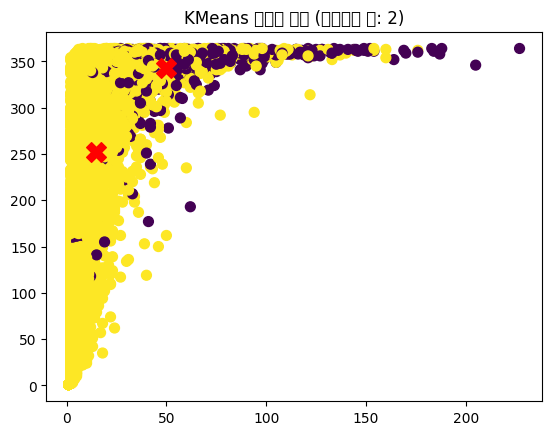

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score
import matplotlib.pyplot as plt

n_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=42)

y_kmeans = kmeans.fit_predict(train_ft)

silhouette = silhouette_score(train_ft, y_kmeans)
calinski_harabasz = calinski_harabasz_score(train_ft, y_kmeans)
davies_bouldin = davies_bouldin_score(train_ft, y_kmeans)

print(f"실루엣 점수 (Silhouette Score): {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

plt.scatter(train_ft.iloc[:, 0], train_ft.iloc[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f"KMeans 군집화 결과 (클러스터 수: {n_clusters})")
plt.show()

In [87]:
kmeans = KMeans(n_clusters=2, random_state=42)
tmp = kmeans.fit_predict(train_ft)

In [88]:
train_ft["kmeans_cluster"] = tmp

In [119]:
test_ft = test_ft.fillna(0)

In [120]:
tmp = kmeans.predict(test_ft)

test_ft["kmeans_cluster"] = tmp

- kmeans가 나음

## 군집화 붙인 후 점수 확인

In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 1000,
 'learning_rate': 0.05586429569143906,
 'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 0.7802866974528223,
 'colsample_bytree': 0.7195355452001226,
 'gamma': 0.5614731761558893}

Mean F1 Macro Score: 0.724168830005045


In [ ]:
scores = []
models = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for tri, val in cv.split(train_ft, target):
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[val]
    y_valid = target.iloc[val]

    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)   
    
    models.append(model)
    pred = model.predict(x_valid)
    score = f1_score(y_valid, pred, average='macro')
    scores.append(score)

print("F1 Macro 평균:", np.mean(scores))

In [125]:
train_ft.to_csv(f"{DATA_PATH}train_cl_1114.csv")
test_ft.to_csv(f"{DATA_PATH}test_cl_1114.csv")

## 군집화 후 확인

In [ ]:
from flaml import AutoML
import xgboost 
from xgboost import XGBClassifier

auto_ml_ens = AutoML()
params = { "metric" : "macro_f1",
           "task" : "classification",
           "time_budget" : 3600,
           "seed" : 42,
           "early_stop" : True,
           "eval_method": "cv",         
           "n_splits": 10,              
           "ensemble" : {'final_estimator' : XGBClassifier() },
           "estimator_list" : ['catboost', 'lgbm', 'rf', 'xgboost', 'histgb']  } 

auto_ml_ens.fit(train_ft, target, **params)

In [ ]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

params = {'n_estimators': 1000,
 'learning_rate': 0.05586429569143906,
 'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 0.7802866974528223,
 'colsample_bytree': 0.7195355452001226,
 'gamma': 0.5614731761558893}


pred_proba = []
models = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for tri, vai in cv.split(train_ft, target):
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    model = XGBClassifier(**params)
    model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], verbose=False)  
     
    models.append(model)
    pred_proba.append(model.predict_proba(x_valid))

In [ ]:
pred_proba = model.predict_proba(test_ft)[:,1]
submit["target"] = pred_proba
submit.to_csv("..submit/data/submit_문준웅.csv",index=False)

In [139]:
params = {'n_estimators': 1000,
 'learning_rate': 0.05586429569143906,
 'max_depth': 3,
 'min_child_weight': 4,
 'subsample': 0.7802866974528223,
 'colsample_bytree': 0.7195355452001226,
 'gamma': 0.5614731761558893}

model = XGBClassifier(**params)
model.fit(train_ft, target)
pred = model.predict(test_ft)

In [140]:
submit["target"] = pred
submit.to_csv("submit_1114_1.csv",index=False)